<a href="https://colab.research.google.com/github/KhangVGU/embedded_anti_spoofing_stm32/blob/main/calibration_schemes/AASIST_MinMax_QDQ_Calibration_Set_Eval_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing
!git clone https://github.com/clovaai/aasist.git

/content/drive/MyDrive/Researches/Anti spoofing
Cloning into 'aasist'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 38 (delta 9), reused 3 (delta 3), pack-reused 16 (from 1)
Receiving objects: 100% (38/38), 1.43 MiB | 29.22 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!pip install -r requirements.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
  Created wheel for tor

In [ ]:
from google.colab import drive
import os

# 1. Mount Google Drive
# drive.mount('/content/drive')

# 2. Change this to your target folder inside Google Drive
# Example: MyDrive/MyProject
target_folder = '/content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_eval'

# 3. Change this to your ZIP file name (must be in target_folder)
zip_filename = 'eval.zip'

# Navigate to the target folder
os.chdir(target_folder)

# 4. Unzip the file
!unzip -o "{zip_filename}"

Streaming output truncated to the last 5000 lines.
  inflating: eval/LA_E_9452493.flac  
  inflating: eval/LA_E_9452505.flac  
  inflating: eval/LA_E_9452579.flac  
  inflating: eval/LA_E_9452660.flac  
  inflating: eval/LA_E_9452672.flac  
  inflating: eval/LA_E_9452673.flac  
  inflating: eval/LA_E_9452703.flac  
  inflating: eval/LA_E_9452794.flac  
  inflating: eval/LA_E_9452810.flac  
  inflating: eval/LA_E_9452918.flac  
  inflating: eval/LA_E_9452979.flac  
  inflating: eval/LA_E_9452980.flac  
  inflating: eval/LA_E_9453205.flac  
  inflating: eval/LA_E_9453229.flac  
  inflating: eval/LA_E_9453422.flac  
  inflating: eval/LA_E_9453549.flac  
  inflating: eval/LA_E_9453587.flac  
  inflating: eval/LA_E_9453606.flac  
  inflating: eval/LA_E_9453636.flac  
  inflating: eval/LA_E_9453674.flac  
  inflating: eval/LA_E_9453691.flac  
  inflating: eval/LA_E_9453739.flac  
  inflating: eval/LA_E_9453887.flac  
  inflating: eval/LA_E_9454144.flac  
  inflating: eval/LA_E_9454224.flac  

In [3]:
!pip install --upgrade onnx onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.4/667.4 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 9.1 MB/s eta 0:00:00


In [4]:
import torch
print("Torch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())

Torch version: 2.6.0+cu124
CUDA version: 12.4
CUDA available: True


Export to ONNX Model

In [ ]:
%cd /content/drive/MyDrive/Researches/Anti spoofing/aasist
# import sys
import torch.onnx
from torch import nn
import json

# PROJECT_ROOT = "/content/aasist"
# if PROJECT_ROOT not in sys.path:
#     sys.path.insert(0, PROJECT_ROOT)

# print(f"✅ Added {PROJECT_ROOT} to sys.path")

# ────────────────────────────────────────────────────────────────────────────
# 2.  LOAD MODEL (+ required `d_args`)
# ────────────────────────────────────────────────────────────────────────────
from AASIST import Model

with open("./config/AASIST.conf", 'r') as f:
  cfg = json.load(f)
  d_args = cfg['model_config']

device = "cuda"
model  = Model(d_args).to(device)
model.load_state_dict(torch.load("./models/weights/AASIST.pth", map_location=device))
model.eval()

# Create dummy input
dummy_input = torch.randn(1, 16000, dtype=torch.float32).to(device)

 # Export to ONNX
torch.onnx.export(
    model,
    dummy_input,
    "./aasist.onnx",
    do_constant_folding=True, # whether to execute constant folding for optimization
    export_params=True,
    opset_version=13,
    input_names=["input"],
    output_names=["embedding", "logits"],
    dynamic_axes={"input": {1: "num_samples"}},
    verbose=False
)
print(f"Model successfully exported")

/content/drive/MyDrive/Researches/Anti spoofing/aasist


/content/drive/MyDrive/Researches/Anti spoofing/aasist/AASIST.py:393: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if mask:
/content/drive/MyDrive/Researches/Anti spoofing/aasist/AASIST.py:315: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  n_nodes = max(int(n_nodes * k), 1)


Model successfully exported


In [5]:
!pip install --upgrade onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade soundfile scipy

Inference using ONNX Runtime

In [ ]:
!python inference_onnx.py \
  --onnx_model_path     aasist.onnx \
  --audio_path     LA/ASVspoof2019_LA_eval/flac/LA_E_6163791.flac


Output:          [[ 10.660248 -11.066106]]
Predicted class:      Spoof


Download subset for evaluation

In [ ]:
%cd /content/drive/MyDrive/Researches/Anti spoofing/aasist
!bash -c "wget -q https://www.dropbox.com/sh/gf3zp00qvdp3row/AABc-QK2BvzEPj-s8nBwCkMna/temp/asvspoof2021/toy_example.tar.gz && \
tar -xzf toy_example.tar.gz"

/content/drive/MyDrive/Researches/Anti spoofing/aasist


ONNX Model Optimization

In [ ]:
%cd /content/drive/MyDrive/Researches/Anti spoofing/aasist
!python -m onnxruntime.quantization.preprocess --input aasist.onnx --output aasist_optimized.onnx --skip_symbolic_shape True

/content/drive/MyDrive/Researches/Anti spoofing/aasist


ONNX Model Quantization

In [ ]:
%cd /content/aasist
import os
import numpy as np
import onnxruntime
from onnxruntime.quantization import QuantFormat, QuantType, StaticQuantConfig, CalibrationMethod, CalibrationDataReader, quantize
import soundfile as sf
from scipy.signal import resample

# Paths
input_model_path = 'aasist_optimized.onnx'
output_model_path = 'aasist_quantized.onnx'
calibration_dataset_path = '/content/aasist/toy_example/eval'  # folder with audio files

# Load audio with same preprocessing as inference script
def _preprocess_audio(file_path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(file_path)

    # Resample if needed
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)

    # Collapse to mono
    if wav.ndim > 1:
        wav = wav.mean(axis=1)

    # Normalize to [-1, 1]
    # max_val = np.max(np.abs(wav))
    # if max_val > 0:
    #     wav = wav / max_val

    return wav.astype(np.float32)[None, :]  # shape (1, num_samples)

class AudioDataReader(CalibrationDataReader):
    def __init__(self, calibration_folder: str, model_path: str):
        self.enum_data = None
        self.audio_files = [os.path.join(calibration_folder, f)
                            for f in os.listdir(calibration_folder)
                            if f.lower().endswith(('.wav', '.flac'))]
        self.input_name = onnxruntime.InferenceSession(model_path).get_inputs()[0].name
        self.audio_data_list = [_preprocess_audio(f) for f in self.audio_files]
        self.datasize = len(self.audio_data_list)

    def get_next(self):
        if self.enum_data is None:
            self.enum_data = iter(
                [{self.input_name: audio} for audio in self.audio_data_list]
            )
        return next(self.enum_data, None)

    def rewind(self):
        self.enum_data = None

# Instantiate DataReader
dr = AudioDataReader(calibration_dataset_path, input_model_path)

# Define quantization configuration
conf = StaticQuantConfig(
    calibration_data_reader=dr,
    quant_format=QuantFormat.QDQ,
    calibrate_method=CalibrationMethod.MinMax,
    # calibration_providers='CUDAExecutionProvider',
    # optimize_model=True, # Removed unsupported argument
    activation_type=QuantType.QUInt8,
    weight_type=QuantType.QInt8,
    per_channel=True,
    extra_options={"ActivationSymmetric":False,
                  "WeightSymmetric":True}
)

# Run quantization
quantize(input_model_path, output_model_path, conf)
print(f"Quantized model saved to {output_model_path}")

/content/aasist


Quantized model saved to aasist_quantized.onnx


In [ ]:
!python inference_onnx.py \
  --onnx_model_path     aasist_quantized.onnx \
  --audio_path     LA/ASVspoof2019_LA_eval/flac/LA_E_6163791.flac


Output:          [[ 5.658438 -5.452677]]
Predicted class:      Spoof


In [ ]:
%cd /content/aasist/
!python evaluate_onnx_folder.py \
    --onnx_model_path aasist.onnx \
    --audio_folder /content/aasist/calibration/Evaluation_100_unique_to_all_calibrations \
    --protocol_path /content/aasist/toy_example/ASVspoof2019.LA.cm.eval.trl.txt

/content/aasist
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
File                           Predicted  True       Result
------------------------------------------------------------
LA_E_1009694.flac              spoof      spoof      ✔️
LA_E_1042916.flac              spoof      spoof      ✔️
LA_E_1095914.flac              spoof      spoof      ✔️
LA_E_1200013.flac              bonafide   spoof      ❌
LA_E_1280322.flac              spoof      spoof      ✔️
LA_E_1359749.flac              spoof      spoof      ✔️
LA_E_1536534.flac              bonafide   spoof      ❌
LA_E_1628984.flac              spoof      spoof      ✔️
LA_E_1637982.flac              spoof      spoof      ✔️
LA_E_1681669.flac              spoof      spoof      ✔️
LA_E_1809034.flac              

In [ ]:
%cd /content/aasist/
!python evaluate_onnx_folder.py \
    --onnx_model_path aasist_quantized_scheme_6.onnx \
    --audio_folder /content/aasist/calibration/Evaluation_100_unique_to_all_calibrations \
    --protocol_path /content/aasist/toy_example/ASVspoof2019.LA.cm.eval.trl.txt


/content/aasist
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
File                           Predicted  True       Result
------------------------------------------------------------
LA_E_1009694.flac              spoof      spoof      ✔️
LA_E_1042916.flac              spoof      spoof      ✔️
LA_E_1095914.flac              bonafide   spoof      ❌
LA_E_1200013.flac              bonafide   spoof      ❌
LA_E_1280322.flac              spoof      spoof      ✔️
LA_E_1359749.flac              spoof      spoof      ✔️
LA_E_1536534.flac              bonafide   spoof      ❌
LA_E_1628984.flac              spoof      spoof      ✔️
LA_E_1637982.flac              spoof      spoof      ✔️
LA_E_1681669.flac              bonafide   spoof      ❌
LA_E_1809034.flac              bo

In [ ]:
!python run_qdq_debug.py --float_model aasist_optimized.onnx --qdq_model aasist_quantized.onnx --calibrate_dataset /content/aasist/toy_example/train_dev

------------------------------------------------

Comparing weights of float model vs qdq model.....
Cross model error of '/HtrgGAT_layer_ST11/proj_without_attM/Add_output_0': -0.38624536023493117

Cross model error of '/HtrgGAT_layer_ST21/proj_without_attM/Add_output_0': 2.387760956000457

Cross model error of '/conv_time/Constant_output_0': 45.080863750788495

Cross model error of 'GAT_layer_S.att_proj.bias': 21.388631933606973

Cross model error of 'GAT_layer_S.att_weight': 45.07301767073577

Cross model error of 'GAT_layer_S.bn.bias': 34.38883244132761

Cross model error of 'GAT_layer_S.bn.weight': 52.09230094365765

Cross model error of 'GAT_layer_S.proj_with_att.bias': 4.3972808889134297e-07

Cross model error of 'GAT_layer_S.proj_without_att.bias': -5.8672289840406715e-08

Cross model error of 'GAT_layer_T.att_proj.bias': 3.0023089370831855

Cross model error of 'GAT_layer_T.att_weight': 45.649438968237945

Cross model error of 'GAT_layer_T.bn.bias': 33.743983935268716

Cross mo

In [ ]:
## Full-sized model parameters

%cd /content/aasist
import onnx
import onnx.helper
import numpy as np

# Load the ONNX model
model = onnx.load("aasist.onnx")

# Iterate through initializers (which store the weights)
total_params = 0
total_bytes = 0

for tensor in model.graph.initializer:
    # Number of parameters
    num_params = 1
    for dim in tensor.dims:
        num_params *= dim

    # Data type size (in bytes)
    # Use onnx.helper.tensor_dtype_to_np_dtype to get the numpy dtype
    # Then access the itemsize attribute
    dtype = onnx.helper.tensor_dtype_to_np_dtype(tensor.data_type)
    dtype_size = dtype.itemsize

    # Accumulate size
    size_bytes = num_params * dtype_size
    total_params += num_params
    total_bytes += size_bytes

    print(f"{tensor.name}: {num_params} params, {size_bytes/1024:.2f} KB")

print(f"\nTotal parameters: {total_params}")
print(f"Total weights size: {total_bytes / (1024 * 1024):.2f} MB")

/content/aasist
pos_S: 1472 params, 5.75 KB
master1: 64 params, 0.25 KB
master2: 64 params, 0.25 KB
first_bn.weight: 1 params, 0.00 KB
first_bn.bias: 1 params, 0.00 KB
first_bn.running_mean: 1 params, 0.00 KB
first_bn.running_var: 1 params, 0.00 KB
encoder.0.0.conv2.weight: 6144 params, 24.00 KB
encoder.0.0.conv2.bias: 32 params, 0.12 KB
encoder.0.0.conv_downsample.weight: 96 params, 0.38 KB
encoder.0.0.conv_downsample.bias: 32 params, 0.12 KB
encoder.1.0.conv2.weight: 6144 params, 24.00 KB
encoder.1.0.conv2.bias: 32 params, 0.12 KB
encoder.2.0.conv2.weight: 24576 params, 96.00 KB
encoder.2.0.conv2.bias: 64 params, 0.25 KB
encoder.2.0.conv_downsample.weight: 6144 params, 24.00 KB
encoder.2.0.conv_downsample.bias: 64 params, 0.25 KB
encoder.3.0.conv2.weight: 24576 params, 96.00 KB
encoder.3.0.conv2.bias: 64 params, 0.25 KB
encoder.4.0.conv2.weight: 24576 params, 96.00 KB
encoder.4.0.conv2.bias: 64 params, 0.25 KB
encoder.5.0.conv2.weight: 24576 params, 96.00 KB
encoder.5.0.conv2.bias: 6

In [ ]:
## Quantized Model Parameters

%cd /content/aasist
import onnx
import onnx.helper
import numpy as np

# Load the ONNX model
model = onnx.load("aasist_quantized.onnx")

# Iterate through initializers (which store the weights)
total_params = 0
total_bytes = 0

for tensor in model.graph.initializer:
    # Number of parameters
    num_params = 1
    for dim in tensor.dims:
        num_params *= dim

    # Data type size (in bytes)
    # Use onnx.helper.tensor_dtype_to_np_dtype to get the numpy dtype
    # Then access the itemsize attribute
    dtype = onnx.helper.tensor_dtype_to_np_dtype(tensor.data_type)
    dtype_size = dtype.itemsize

    # Accumulate size
    size_bytes = num_params * dtype_size
    total_params += num_params
    total_bytes += size_bytes

    print(f"{tensor.name}: {num_params} params, {size_bytes/1024:.2f} KB")

print(f"\nTotal parameters: {total_params}")
print(f"Total weights size: {total_bytes / (1024 * 1024):.2f} MB")

/content/aasist
first_bn.running_mean: 1 params, 0.00 KB
first_bn.running_var: 1 params, 0.00 KB
GAT_layer_S.bn.running_mean: 64 params, 0.25 KB
GAT_layer_S.bn.running_var: 64 params, 0.25 KB
GAT_layer_T.bn.running_mean: 64 params, 0.25 KB
GAT_layer_T.bn.running_var: 64 params, 0.25 KB
/pool_hS1/Mul_output_0: 3 params, 0.02 KB
HtrgGAT_layer_ST11.bn.running_mean: 32 params, 0.12 KB
HtrgGAT_layer_ST11.bn.running_var: 32 params, 0.12 KB
HtrgGAT_layer_ST12.bn.running_mean: 32 params, 0.12 KB
HtrgGAT_layer_ST12.bn.running_var: 32 params, 0.12 KB
/HtrgGAT_layer_ST11/Mul_13_output_0: 4 params, 0.03 KB
HtrgGAT_layer_ST21.bn.running_mean: 32 params, 0.12 KB
HtrgGAT_layer_ST21.bn.running_var: 32 params, 0.12 KB
HtrgGAT_layer_ST22.bn.running_mean: 32 params, 0.12 KB
HtrgGAT_layer_ST22.bn.running_var: 32 params, 0.12 KB
/HtrgGAT_layer_ST12/ConstantOfShape_5_output_0: 4 params, 0.03 KB
/pool_hS1/ConstantOfShape_output_0: 3 params, 0.02 KB
/HtrgGAT_layer_ST22/Constant_148_output_0: 1 params, 0.01 KB

In [ ]:
import onnxruntime as ort
import torch
import numpy as np
import soundfile as sf
from scipy.signal import resample
import torch.nn.functional as F

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    # If stereo, take mean to mono
    if wav.ndim > 1:
        wav = wav.mean(axis=1)
    return wav

# ────────────────────────────────────────────────────────────
# 1. Load and preprocess audio
# ────────────────────────────────────────────────────────────
audio_path = "/content/aasist/LA/ASVspoof2019_LA_eval/flac/LA_E_5849185.flac"
wav = load_audio(audio_path, target_sr=16000)

# ONNX Runtime expects a NumPy array of shape (batch, num_samples)
input_data = wav.astype(np.float32)[None, :]  # shape = (1, 16000)
# input_data = torch.from_numpy(wav).float().unsqueeze(0)

# ────────────────────────────────────────────────────────────
# 2. Create an ONNX Runtime session
# ────────────────────────────────────────────────────────────
session = ort.InferenceSession("aasist_quantized.onnx", providers=["CPUExecutionProvider"])

# ────────────────────────────────────────────────────────────
# 3. Run inference
# ────────────────────────────────────────────────────────────
# Make sure these names match the ones you used in torch.onnx.export
output_names = ["embedding", "logits"]
embedding, logits = session.run(output_names, {"input": input_data})

# ────────────────────────────────────────────────────────────
# 4. Post-process logits into probabilities & decision
# ────────────────────────────────────────────────────────────
# logits shape: (1, 2)  →  [spoof_score, bona-fide_score]
probs = F.softmax(torch.from_numpy(logits), dim=1).numpy()[0]
pred_label = "bona-fide" if probs[1] > probs[0] else "spoof"

print(f"Embedding shape: {embedding.shape}")
print(f"Logits:          {logits}")
print(f"Probabilities:   spoof={probs[0]:.4f}, bona-fide={probs[1]:.4f}")
print(f"→ Decision:      {pred_label}")


Embedding shape: (1, 160)
Logits:          [[-5.452677   3.8065858]]
Probabilities:   spoof=0.0001, bona-fide=0.9999
→ Decision:      bona-fide


In [ ]:
!python inference_onnx.py \
  --onnx_model_path     aasist.onnx \
  --audio_path     LA/ASVspoof2019_LA_eval/flac/LA_E_5849185.flac


Output:          [[-5.3730516  3.8038929]]
Predicted class:      Bona-fide


In [ ]:
import os

def count_identical_filenames(folder1, folder2):
    # List all files in both folders
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))

    # Find intersection (identical filenames)
    identical_files = files1.intersection(files2)

    print(f"Identical filenames ({len(identical_files)}):")
    for filename in identical_files:
        print(filename)

    return len(identical_files)

# Example usage
folder_path_1 = '/content/drive/MyDrive/Researches/Anti spoofing/aasist/toy_example/eval'
folder_path_2 = '/content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations'
count = count_identical_filenames(folder_path_1, folder_path_2)
print(f"Total identical filenames: {count}")


Identical filenames (0):
Total identical filenames: 0


In [ ]:
# --- Google Colab cell: build calibration/evaluation splits from protocol and copy files ---

import os
import re
import random
import shutil
from collections import defaultdict, Counter
from pathlib import Path

# =========================
# User parameters
# =========================
AUDIO_ROOT = "/content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_dev/flac"   # Root folder containing audio files (recursively)
PROTOCOL_TXT = "/content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt" # Path to the protocol .txt
OUTPUT_ROOT = "/content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment"                # Where to create the output folders
AUDIO_EXTS = {".flac", ".wav"}                 # Accepted audio extensions
RANDOM_SEED = 1337                             # Seed for reproducibility
# =========================

# Output folders
OUT_CAL1 = "Calibration_1_bonafide_100"
OUT_CAL2 = "Calibration_2_A01-A06_20_each"
OUT_CAL3 = "Calibration_3_train_20_each"
OUT_CAL7 = "Calibration_7_train_150_random"
# OUT_EVAL = "Evaluation_100_unique"

random.seed(RANDOM_SEED)
Path(OUTPUT_ROOT).mkdir(parents=True, exist_ok=True)

# 1) Index all available audio by stem -> full path
audio_index = {}
for p in Path(AUDIO_ROOT).rglob("*"):
    if p.is_file() and p.suffix.lower() in AUDIO_EXTS:
        audio_index[p.stem] = str(p.resolve())

print(f"Indexed {len(audio_index)} audio files by stem from {AUDIO_ROOT}")

# 2) Parse protocol
# Lines look like:
# LA_0039 LA_E_2834763 - A11 spoof
# LA_0033 LA_E_4581379 - - bonafide
def parse_line(line: str):
    toks = line.strip().split()
    if len(toks) < 2:
        return None
    # robust parsing
    # expected positions:
    # toks[1] -> filename stem
    # toks[-1] -> class token (spoof or bonafide)
    # toks[3] -> attacker type if spoof, otherwise '-'
    fname_stem = toks[1]
    label_tok = toks[-1].lower()
    # handle possible misspelling in some lists: 'bonfide'
    is_bonafide = label_tok.startswith("bona") or label_tok == "bonafide"
    label = "bonafide" if is_bonafide else "spoof"

    attacker = None
    if label == "spoof":
        # Try to read the 4th token safely
        attacker = toks[3] if len(toks) >= 4 else None
        # Normalize attacker to format A01..A19 etc.
        if attacker is not None and not re.match(r"^A\d{2}$", attacker):
            attacker = None
    return fname_stem, label, attacker

records = []
with open(PROTOCOL_TXT, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        parsed = parse_line(line)
        if parsed is None:
            continue
        stem, label, attacker = parsed
        # Only keep entries that actually exist on disk
        if stem in audio_index:
            records.append({"stem": stem, "path": audio_index[stem], "label": label, "attacker": attacker})

print(f"Protocol matched {len(records)} files on disk")

# 3) Collect sets for selection
bonafide = [r for r in records if r["label"] == "bonafide"]
spoof = [r for r in records if r["label"] == "spoof"]
by_attacker = defaultdict(list)
for r in spoof:
    if r["attacker"] is not None:
        by_attacker[r["attacker"]].append(r)

# Helper to sample without replacement with safety checks
def sample_items(items, k):
    if k <= 0:
        return []
    if len(items) <= k:
        # Take all if not enough, and warn
        print(f"Warning: requested {k} but only {len(items)} available. Taking all.")
        return list(items)
    return random.sample(items, k)

# 4) Build selections
selected = set()  # stems already used

# Calibration 1: only bonafide, 100 samples
cal1 = sample_items([r for r in bonafide if r["stem"] not in selected], 100)
for r in cal1:
    selected.add(r["stem"])

# Calibration 2: only attacker types A01-A06, 100 samples, selected equally in quantity
target_attackers = [f"A{n:02d}" for n in range(1, 7)]  # A01..A06
# Compute near-equal targets that sum to 100
base = 100 // len(target_attackers)  # 16
rem = 100 % len(target_attackers)    # 4
targets = {atk: base + (1 if i < rem else 0) for i, atk in enumerate(target_attackers)}

cal2 = []
# for i, atk in enumerate(target_attackers):
#     pool = [r for r in by_attacker.get(atk, []) if r["stem"] not in selected]
#     need = targets[atk]
#     pick = sample_items(pool, need)
#     cal2.extend(pick)
#     for r in pick:
#         selected.add(r["stem"])

# # If still short of 100 due to scarcity, top-up from remaining A01-A06
# if len(cal2) < 100:
#     remaining_pool = [r for atk in target_attackers for r in by_attacker.get(atk, []) if r["stem"] not in selected]
#     topup = sample_items(remaining_pool, 100 - len(cal2))
#     cal2.extend(topup)
#     for r in topup:
#         selected.add(r["stem"])
for atk in target_attackers:
    pool = [r for r in by_attacker.get(atk, []) if r["stem"] not in selected]
    pick = sample_items(pool, 20)
    cal2.extend(pick)
    for r in pick:
        selected.add(r["stem"])

# Calibration 3: bonafide AND A01-A06 spoof, 20 samples each class
cal3 = []

# 20 bonafide samples
pool_bonafide = [r for r in bonafide if r["stem"] not in selected]
pick_bonafide = sample_items(pool_bonafide, 20)
cal3.extend(pick_bonafide)
for r in pick_bonafide:
    selected.add(r["stem"])

# 20 for each attacker type A01-A06
for atk in target_attackers:
    pool = [r for r in by_attacker.get(atk, []) if r["stem"] not in selected]
    pick = sample_items(pool, 20)
    cal3.extend(pick)
    for r in pick:
        selected.add(r["stem"])

# Calibration 7: 150 random samples from the entire dataset (any class)
cal7 = []
cal7 = sample_items([r for r in records if r["stem"] not in selected], 150)
for r in cal7:
    selected.add(r["stem"])

# Evaluation: 100 random samples not included above, any class
# remaining_pool = [r for r in records if r["stem"] not in selected]
# eval_set = sample_items(remaining_pool, 100)
# for r in eval_set:
#     selected.add(r["stem"])

# 5) Create output folders and copy files
def copy_set(name, items):
    out_dir = Path(OUTPUT_ROOT) / name
    out_dir.mkdir(parents=True, exist_ok=True)
    for r in items:
        dst = out_dir / f"{Path(r['path']).name}"
        shutil.copy2(r["path"], dst)
    return out_dir

out1 = copy_set(OUT_CAL1, cal1)
out2 = copy_set(OUT_CAL2, cal2)
out3 = copy_set(OUT_CAL3, cal3)
out7 = copy_set(OUT_CAL7, cal7)
# out4 = copy_set(OUT_EVAL, eval_set)

# 6) Summaries
def summarize(tag, items):
    c_label = Counter([r["label"] for r in items])
    c_atk = Counter([r["attacker"] for r in items if r["attacker"]])
    print(f"\n[{tag}] count = {len(items)}")
    print("  Labels:", dict(c_label))
    if c_atk:
        # show A01..A06 in order if applicable
        ordered = {k: c_atk.get(k, 0) for k in sorted(c_atk.keys())}
        print("  Attackers:", ordered)

summarize(OUT_CAL1, cal1)
summarize(OUT_CAL2, cal2)
summarize(OUT_CAL3, cal3)
summarize(OUT_CAL7, cal7)
# summarize(OUT_EVAL, eval_set)

print("\nDone.")
print(f"Output root: {OUTPUT_ROOT}")
print(f"Folders created:\n - {out1}\n - {out2}\n - {out3}\n - {out7}")


Indexed 22275 audio files by stem from /content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_dev/flac
Protocol matched 22146 files on disk

[Calibration_1_bonafide_100] count = 100
  Labels: {'bonafide': 100}

[Calibration_2_A01-A06_20_each] count = 120
  Labels: {'spoof': 120}
  Attackers: {'A01': 20, 'A02': 20, 'A03': 20, 'A04': 20, 'A05': 20, 'A06': 20}

[Calibration_3_train_20_each] count = 140
  Labels: {'bonafide': 20, 'spoof': 120}
  Attackers: {'A01': 20, 'A02': 20, 'A03': 20, 'A04': 20, 'A05': 20, 'A06': 20}

[Calibration_7_train_150_random] count = 150
  Labels: {'bonafide': 13, 'spoof': 137}
  Attackers: {'A01': 25, 'A02': 21, 'A03': 22, 'A04': 22, 'A05': 21, 'A06': 26}

Done.
Output root: /content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment
Folders created:
 - /content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment/Calibration_1_bonafide_100
 - /content/drive/MyDrive/Researches/Anti spoofing/aasis

In [ ]:
%cd /content/drive/MyDrive/Researches/Anti spoofing/aasist
import os
import numpy as np
import onnxruntime
from onnxruntime.quantization import QuantFormat, QuantType, StaticQuantConfig, CalibrationMethod, CalibrationDataReader, quantize
import soundfile as sf
from scipy.signal import resample

# Paths
input_model_path = 'aasist_optimized.onnx'
output_model_path = 'aasist_quantized_scheme_8.onnx'
calibration_dataset_path = '/content/drive/MyDrive/Researches/Anti spoofing/aasist/toy_example/eval'  # folder with audio files

# Load audio with same preprocessing as inference script
def _preprocess_audio(file_path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(file_path)

    # Resample if needed
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)

    # Collapse to mono
    if wav.ndim > 1:
        wav = wav.mean(axis=1)

    # Normalize to [-1, 1]
    # max_val = np.max(np.abs(wav))
    # if max_val > 0:
    #     wav = wav / max_val

    return wav.astype(np.float32)[None, :]  # shape (1, num_samples)

class AudioDataReader(CalibrationDataReader):
    def __init__(self, calibration_folder: str, model_path: str):
        self.enum_data = None
        self.audio_files = [os.path.join(calibration_folder, f)
                            for f in os.listdir(calibration_folder)
                            if f.lower().endswith(('.wav', '.flac'))]
        self.input_name = onnxruntime.InferenceSession(model_path).get_inputs()[0].name
        self.audio_data_list = [_preprocess_audio(f) for f in self.audio_files]
        self.datasize = len(self.audio_data_list)

    def get_next(self):
        if self.enum_data is None:
            self.enum_data = iter(
                [{self.input_name: audio} for audio in self.audio_data_list]
            )
        return next(self.enum_data, None)

    def rewind(self):
        self.enum_data = None

# Instantiate DataReader
dr = AudioDataReader(calibration_dataset_path, input_model_path)

# Define quantization configuration
conf = StaticQuantConfig(
    calibration_data_reader=dr,
    quant_format=QuantFormat.QDQ,
    calibrate_method=CalibrationMethod.MinMax,
    # calibration_providers='CUDAExecutionProvider',
    # optimize_model=True, # Removed unsupported argument
    activation_type=QuantType.QUInt8,
    weight_type=QuantType.QInt8,
    per_channel=True,
    extra_options={"ActivationSymmetric":False,
                  "WeightSymmetric":True}
)

# Run quantization
quantize(input_model_path, output_model_path, conf)
print(f"Quantized model saved to {output_model_path}")

/content/drive/MyDrive/Researches/Anti spoofing/aasist


Quantized model saved to aasist_quantized_scheme_8.onnx


In [ ]:
# --- Google Colab cell: create Calibration 4, Calibration 5, and a new Evaluation set ---

import os
import re
import random
import shutil
from collections import defaultdict, Counter
from pathlib import Path

# =========================
# User parameters
# =========================
AUDIO_ROOT = "/content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_eval/flac"   # Root folder containing audio files (recursively)
PROTOCOL_TXT = "/content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt" # Path to the protocol .txt
OUTPUT_ROOT = "/content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment"                # Root where calibration folders were or will be created
AUDIO_EXTS = {".flac", ".wav"}                 # Accepted audio extensions
RANDOM_SEED = 1337                             # Seed for reproducibility
# =========================

# New output folders
OUT_CAL4 = "Calibration_4_A07-A19_20_each"
OUT_CAL5 = "Calibration_5_bonafide_20_plus_A07-A19_20_each"
OUT_EVAL = "Evaluation_500_unique_to_all_calibrations"

random.seed(RANDOM_SEED)
Path(OUTPUT_ROOT).mkdir(parents=True, exist_ok=True)

# Helper: index audio by stem
audio_index = {}
for p in Path(AUDIO_ROOT).rglob("*"):
    if p.is_file() and p.suffix.lower() in AUDIO_EXTS:
        audio_index[p.stem] = str(p.resolve())
print(f"Indexed {len(audio_index)} audio files by stem from {AUDIO_ROOT}")

# Parse protocol lines like:
# LA_0039 LA_E_2834763 - A11 spoof
# LA_0033 LA_E_4581379 - - bonafide
def parse_line(line: str):
    toks = line.strip().split()
    if len(toks) < 2:
        return None
    fname_stem = toks[1]
    label_tok = toks[-1].lower()
    is_bonafide = label_tok.startswith("bona") or label_tok == "bonafide"
    label = "bonafide" if is_bonafide else "spoof"
    attacker = None
    if label == "spoof":
        attacker = toks[3] if len(toks) >= 4 else None
        if attacker is not None and not re.match(r"^A\d{2}$", attacker):
            attacker = None
    return fname_stem, label, attacker

# Build records that exist on disk
records = []
with open(PROTOCOL_TXT, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        parsed = parse_line(line)
        if not parsed:
            continue
        stem, label, attacker = parsed
        if stem in audio_index:
            records.append({"stem": stem, "path": audio_index[stem], "label": label, "attacker": attacker})

print(f"Protocol matched {len(records)} files on disk")

# Split helpers
bonafide = [r for r in records if r["label"] == "bonafide"]
spoof = [r for r in records if r["label"] == "spoof"]
by_attacker = defaultdict(list)
for r in spoof:
    if r["attacker"]:
        by_attacker[r["attacker"]].append(r)

# Build a set of stems already used in any existing Calibration_* folders to keep uniqueness
selected = set()
for d in Path(OUTPUT_ROOT).glob("Calibration_*"):
    if d.is_dir():
        for f in d.iterdir():
            if f.is_file():
                selected.add(f.stem)

print(f"Found {len(selected)} already-selected stems from existing calibration folders in {OUTPUT_ROOT}")

# Sampling helper with safety
def sample_items(items, k):
    pool = list(items)
    if k <= 0:
        return []
    if len(pool) <= k:
        if len(pool) < k:
            print(f"Warning: requested {k} but only {len(pool)} available. Taking all.")
        return pool
    return random.sample(pool, k)

# Copy helper
def copy_set(name, items):
    out_dir = Path(OUTPUT_ROOT) / name
    out_dir.mkdir(parents=True, exist_ok=True)
    for r in items:
        shutil.copy2(r["path"], out_dir / Path(r["path"]).name)
    return out_dir

# Summarize helper
def summarize(tag, items):
    from collections import Counter
    c_label = Counter([r["label"] for r in items])
    c_atk = Counter([r["attacker"] for r in items if r["attacker"]])
    print(f"\n[{tag}] count = {len(items)}")
    print("  Labels:", dict(c_label))
    if c_atk:
        ordered = {k: c_atk.get(k, 0) for k in sorted(c_atk.keys())}
        print("  Attackers:", ordered)

# =========================
# Calibration 4: A07-A19, 20 samples each attacker
# =========================
target_attackers_07_19 = [f"A{n:02d}" for n in range(7, 20)]  # A07..A19 inclusive

cal4 = []
for atk in target_attackers_07_19:
    pool = [r for r in by_attacker.get(atk, []) if r["stem"] not in selected]
    pick = sample_items(pool, 20)  # fixed 20 per attacker
    cal4.extend(pick)
    for r in pick:
        selected.add(r["stem"])

out4 = copy_set(OUT_CAL4, cal4)
summarize(OUT_CAL4, cal4)

# =========================
# Calibration 5: Bonafide 20 + spoof A07-A19, 20 each
# =========================
cal5 = []

# Bonafide 20
pool_bona = [r for r in bonafide if r["stem"] not in selected]
pick_bona = sample_items(pool_bona, 20)
cal5.extend(pick_bona)
for r in pick_bona:
    selected.add(r["stem"])

# Spoof A07-A19, 20 each attacker
for atk in target_attackers_07_19:
    pool = [r for r in by_attacker.get(atk, []) if r["stem"] not in selected]
    pick = sample_items(pool, 20)
    cal5.extend(pick)
    for r in pick:
        selected.add(r["stem"])

out5 = copy_set(OUT_CAL5, cal5)
summarize(OUT_CAL5, cal5)

# =========================
# Evaluation: 500 random, unique to all calibration folders
# =========================
remaining_pool = [r for r in records if r["stem"] not in selected]
eval_set = sample_items(remaining_pool, 500)
out_eval = copy_set(OUT_EVAL, eval_set)
summarize(OUT_EVAL, eval_set)

print("\nDone.")
print(f"Output root: {OUTPUT_ROOT}")
print(f"Folders created:\n - {out4}\n - {out5}\n - {out_eval}")


Indexed 71933 audio files by stem from /content/drive/MyDrive/Scientific Projects/University of Stuttgart/ASVSpoof Datasets/2019/LA/ASVspoof2019_LA_eval/flac
Protocol matched 71237 files on disk
Found 510 already-selected stems from existing calibration folders in /content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment

[Calibration_4_A07-A19_20_each] count = 260
  Labels: {'spoof': 260}
  Attackers: {'A07': 20, 'A08': 20, 'A09': 20, 'A10': 20, 'A11': 20, 'A12': 20, 'A13': 20, 'A14': 20, 'A15': 20, 'A16': 20, 'A17': 20, 'A18': 20, 'A19': 20}

[Calibration_5_bonafide_20_plus_A07-A19_20_each] count = 280
  Labels: {'bonafide': 20, 'spoof': 260}
  Attackers: {'A07': 20, 'A08': 20, 'A09': 20, 'A10': 20, 'A11': 20, 'A12': 20, 'A13': 20, 'A14': 20, 'A15': 20, 'A16': 20, 'A17': 20, 'A18': 20, 'A19': 20}

[Evaluation_500_unique_to_all_calibrations] count = 500
  Labels: {'spoof': 434, 'bonafide': 66}
  Attackers: {'A07': 27, 'A08': 40, 'A09': 43, 'A10': 29, 'A11': 33, 'A12': 37, 'A13

In [ ]:
%cd /content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment
# --- Google Colab cell: Combine Calibration 2 and Calibration 5 into Calibration 6 ---

import shutil
from pathlib import Path

# =========================
# User parameters
# =========================
OUTPUT_ROOT = "/content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment"  # Root containing existing calibration folders
CAL2_NAME = "Calibration_2_A01-A06_equal_100"
CAL5_NAME = "Calibration_5_bonafide_20_plus_A07-A19_20_each"
CAL6_NAME = "Calibration_6_combined_cal2_cal5"
# =========================

# Paths
cal2_path = Path(OUTPUT_ROOT) / CAL2_NAME
cal5_path = Path(OUTPUT_ROOT) / CAL5_NAME
cal6_path = Path(OUTPUT_ROOT) / CAL6_NAME
cal6_path.mkdir(parents=True, exist_ok=True)

# Collect unique files from both folders (by stem to avoid duplicates)
seen_stems = set()
copied_count = 0

for src_folder in [cal2_path, cal5_path]:
    if not src_folder.exists():
        print(f"Warning: {src_folder} does not exist, skipping...")
        continue
    for file in src_folder.iterdir():
        if file.is_file():
            if file.stem not in seen_stems:
                shutil.copy2(file, cal6_path / file.name)
                seen_stems.add(file.stem)
                copied_count += 1

print(f"Calibration 6 created at: {cal6_path}")
print(f"Total unique files copied: {copied_count}")


/content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment
Calibration 6 created at: /content/drive/MyDrive/Researches/Anti spoofing/aasist/experiment/Calibration_6_combined_cal2_cal5
Total unique files copied: 280


In [ ]:
# --- Google Colab cell: analyze folder and count classes from a protocol file ---

import os
import re
from collections import defaultdict, Counter
from pathlib import Path
import csv

# =========================
# User parameters
# =========================
AUDIO_ROOT = "/content/aasist/toy_example/eval"   # Root folder containing audio files (recursively)
PROTOCOL_TXT = "/content/aasist/toy_example/protocol.txt" # Path to protocol .txt
AUDIO_EXTS = {".flac", ".wav"}                 # Accepted audio extensions
EXPORT_CSV = False                               # Set to True to write CSV summaries
OUTPUT_DIR = "/content/analysis_out"            # Where to save CSV files if EXPORT_CSV is True
# =========================

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# 1) Index audio files by stem
audio_index = {}
for p in Path(AUDIO_ROOT).rglob("*"):
    if p.is_file() and p.suffix.lower() in AUDIO_EXTS:
        audio_index[p.stem] = str(p.resolve())

print(f"Indexed {len(audio_index)} audio files by stem from: {AUDIO_ROOT}")

# 2) Protocol parsing
# Example lines:
# LA_0039 LA_E_2834763 - A11 spoof
# LA_0033 LA_E_4581379 - - bonafide
def parse_line(line: str):
    toks = line.strip().split()
    if len(toks) < 2:
        return None
    stem = toks[1]
    cls_tok = toks[-1].lower()
    is_bonafide = cls_tok.startswith("bona") or cls_tok == "bonfide"
    label = "bonafide" if is_bonafide else "spoof"
    attacker = None
    if label == "spoof":
        attacker = toks[3] if len(toks) >= 4 else None
        # Normalize only Axx patterns
        if attacker is not None and not re.match(r"^A\d{2}$", attacker):
            attacker = None
    return stem, label, attacker

records = []
all_protocol_stems = set()
with open(PROTOCOL_TXT, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        parsed = parse_line(line)
        if not parsed:
            continue
        stem, label, attacker = parsed
        all_protocol_stems.add(stem)
        if stem in audio_index:
            records.append({"stem": stem, "path": audio_index[stem], "label": label, "attacker": attacker})

print(f"Protocol entries on disk: {len(records)}")
missing_from_disk = sorted(all_protocol_stems - set(r["stem"] for r in records))
print(f"Protocol stems missing on disk: {len(missing_from_disk)}")

# 3) Counting
total = len(records)
count_label = Counter(r["label"] for r in records)
count_attacker = Counter(r["attacker"] for r in records if r["attacker"])

def pct(x, n):
    return 0.0 if n == 0 else 100.0 * x / n

print("\n=== Summary ===")
print(f"Total matched files: {total}")
print(f"Bonafide: {count_label.get('bonafide', 0)} ({pct(count_label.get('bonafide', 0), total):.2f}%)")
print(f"Spoof:    {count_label.get('spoof', 0)} ({pct(count_label.get('spoof', 0), total):.2f}%)")

# Print per-attacker distribution sorted by attacker code
if count_attacker:
    print("\nPer-attacker counts among spoof:")
    for atk in sorted(count_attacker.keys()):
        print(f"  {atk}: {count_attacker[atk]}")

# 4) Optional CSV exports
if EXPORT_CSV:
    # CSV 1: per class counts
    cls_csv = Path(OUTPUT_DIR) / "class_counts.csv"
    with open(cls_csv, "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["class", "count", "percent"])
        for cls in ("bonafide", "spoof"):
            c = count_label.get(cls, 0)
            w.writerow([cls, c, f"{pct(c, total):.2f}"])
    print(f"\nSaved: {cls_csv}")

    # CSV 2: per attacker counts
    atk_csv = Path(OUTPUT_DIR) / "attacker_counts.csv"
    with open(atk_csv, "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["attacker", "count"])
        for atk in sorted(count_attacker.keys()):
            w.writerow([atk, count_attacker[atk]])
    print(f"Saved: {atk_csv}")

    # CSV 3: detailed matched list
    det_csv = Path(OUTPUT_DIR) / "matched_files_detailed.csv"
    with open(det_csv, "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["stem", "label", "attacker", "path"])
        for r in sorted(records, key=lambda x: (x["label"], x["attacker"] or "A00", x["stem"])):
            w.writerow([r["stem"], r["label"], r["attacker"] or "", r["path"]])
    print(f"Saved: {det_csv}")

    # CSV 4: protocol stems missing on disk
    miss_csv = Path(OUTPUT_DIR) / "protocol_missing_on_disk.csv"
    with open(miss_csv, "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["missing_stem"])
        for s in missing_from_disk:
            w.writerow([s])
    print(f"Saved: {miss_csv}")

print("\nDone.")


Indexed 150 audio files by stem from: /content/aasist/toy_example/eval
Protocol entries on disk: 150
Protocol stems missing on disk: 150

=== Summary ===
Total matched files: 150
Bonafide: 16 (10.67%)
Spoof:    134 (89.33%)

Per-attacker counts among spoof:
  A07: 7
  A08: 11
  A09: 9
  A10: 10
  A11: 14
  A12: 6
  A13: 6
  A14: 15
  A15: 10
  A16: 12
  A17: 13
  A18: 12
  A19: 9

Done.


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_1.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme1.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=264, TN=65, FP=0, FN=171
Accuracy: 0.6580
FPR: 0.0000   FNR: 0.3931   EER: 0.1966
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme1.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_2.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme2.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=320, TN=65, FP=0, FN=115
Accuracy: 0.7700
FPR: 0.0000   FNR: 0.2644   EER: 0.1322
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme2.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_3.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme3.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=99, TN=65, FP=0, FN=336
Accuracy: 0.3280
FPR: 0.0000   FNR: 0.7724   EER: 0.3862
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme3.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_4.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme4.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=171, TN=65, FP=0, FN=264
Accuracy: 0.4720
FPR: 0.0000   FNR: 0.6069   EER: 0.3034
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme4.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_5.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme5.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=169, TN=65, FP=0, FN=266
Accuracy: 0.4680
FPR: 0.0000   FNR: 0.6115   EER: 0.3057
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme5.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_6.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme6.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=169, TN=65, FP=0, FN=266
Accuracy: 0.4680
FPR: 0.0000   FNR: 0.6115   EER: 0.3057
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme6.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_7.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme7.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=130, TN=65, FP=0, FN=305
Accuracy: 0.3900
FPR: 0.0000   FNR: 0.7011   EER: 0.3506
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme7.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist_quantized_scheme_8.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme8.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=312, TN=65, FP=0, FN=123
Accuracy: 0.7540
FPR: 0.0000   FNR: 0.2828   EER: 0.1414
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/scheme8.png


In [ ]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
!python evaluate_calib_schemes.py \
    --onnx_model_path aasist.onnx \
    --audio_folder /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/Evaluation_500_unique_to_all_calibrations \
    --save_plot /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/original.png \
    --protocol_path /content/drive/MyDrive/Scientific_Projects/University_of_Stuttgart/ASVSpoof_Datasets/2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt

/content/drive/MyDrive/Researches/Anti_spoofing/aasist

------------------------------------------------------------
Evaluated 500 files.
TP=358, TN=65, FP=0, FN=77
Accuracy: 0.8460
FPR: 0.0000   FNR: 0.1770   EER: 0.0885
Confusion matrix saved to: /content/drive/MyDrive/Researches/Anti_spoofing/aasist/experiment/original.png


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
First layer tensor shape: B=1, C_out=70, T_out=86468


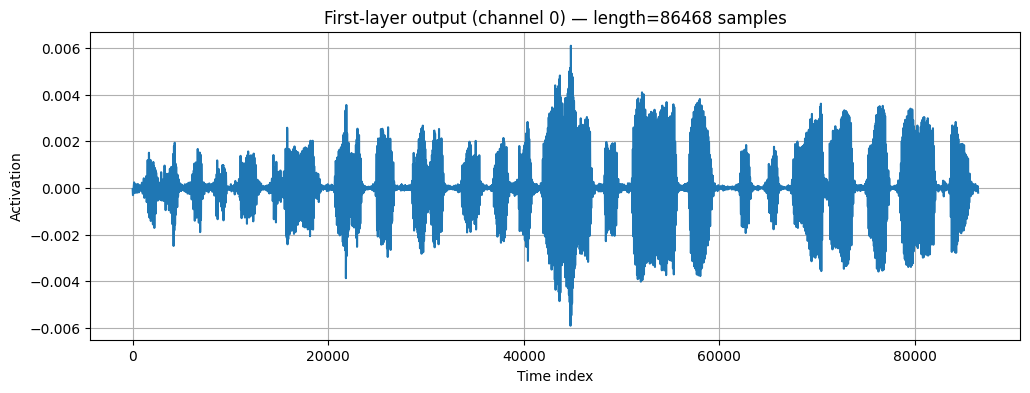

In [10]:
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_WAV     = "./experiment/Calibration_2_A01-A06_20_each/LA_D_1147199.flac"          # 16 kHz mono is ideal

# 2) Optional: install deps if Colab image is fresh
# You can comment this out if already installed
# !pip -q install soundfile scipy --upgrade

import json
import numpy as np
import torch
import torch.nn.functional as F
import soundfile as sf
from scipy.signal import resample
import matplotlib.pyplot as plt

# If your project files are in the runtime, make sure AASIST.py and utils.py are reachable.
# For example:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    # Fallback: default to False if your utils.py is not available
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    # Convert stereo to mono if needed
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

# 3) Load config
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug = str_to_bool(cfg.get("freq_aug", "False"))

# 4) Device and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)

# 5) Load checkpoint
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)

model.eval()
torch.set_grad_enabled(False)

# 6) Prepare input for conv1d: [B, 1, T]
wav = load_audio(AUDIO_WAV, target_sr=16000)
x = torch.from_numpy(wav).unsqueeze(0).unsqueeze(1).to(device)  # [1, 1, T]

# 7) Run ONLY the first layer and print its shape
y = model.conv_time(x, mask=freq_aug)  # CONV.forward -> F.conv1d
B, C_out, T_out = y.shape
print(f"First layer tensor shape: B={B}, C_out={C_out}, T_out={T_out}")

# 8) Plot T_out for the first channel
plt.figure(figsize=(12, 4))
plt.plot(y[0, 0].detach().cpu().numpy())  # plot first channel
plt.title(f"First-layer output (channel 0) — length={T_out} samples")
plt.xlabel("Time index")
plt.ylabel("Activation")
plt.grid(True)
plt.show()


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
Total files: 120  |  Buckets formed: 9
Collected features: (120, 70)  (files x channels)


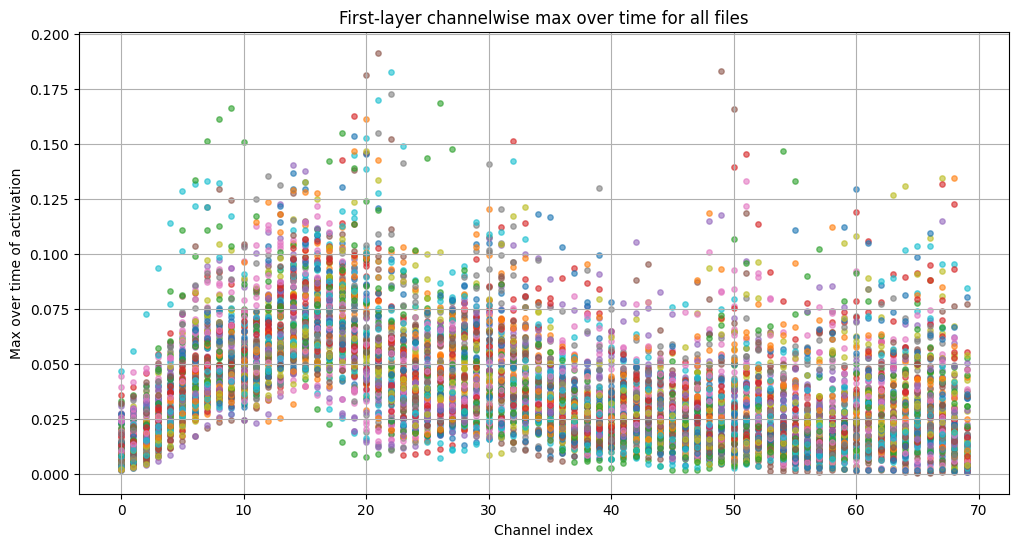

In [13]:
# ============================================
# AASIST - First layer max-over-time per channel, for a whole folder
# ============================================
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_FOLDER     = "./experiment/Calibration_2_A01-A06_20_each/"          # 16 kHz mono is ideal

# 2) Options
SAMPLE_RATE        = 16000
BATCH_SIZE_MAX     = 16         # micro-batch size
BUCKET_TOL         = 2.0        # files in a bucket have length within 2x
PER_FILE_MASK      = False      # True = independent freq mask per file if freq_aug=True in config
NORMALIZE_PER_FILE = False      # True = L2-normalize each vector of channelwise maxima before plotting
SHOW_LEGEND        = False      # set True if few files, otherwise legend gets long
SAVE_CSV           = False      # save a CSV of per-file vectors
CSV_PATH           = "./experiment/csv/first_layer_channelwise_max.csv"

# 3) Install deps if needed
# !pip -q install soundfile scipy matplotlib --upgrade

import os
import json
import math
import numpy as np
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample
from typing import List, Tuple

# Ensure project modules are importable, e.g.:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

def list_wavs_with_lengths(folder: str) -> List[Tuple[str, int]]:
    files = [f for f in os.listdir(folder) if f.lower().endswith(".flac")]
    files.sort()
    out = []
    for f in files:
        try:
            info = sf.info(os.path.join(folder, f))
            out.append((f, int(info.frames)))
        except Exception:
            wav = load_audio(os.path.join(folder, f), SAMPLE_RATE)
            out.append((f, len(wav)))
    out.sort(key=lambda x: x[1])
    return out

def conv1d_out_len(L: int, k: int, s: int = 1, p: int = 0, d: int = 1) -> int:
    return math.floor((L + 2*p - d*(k - 1) - 1)/s + 1)

# 4) Load config and model
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug_flag = str_to_bool(cfg.get("freq_aug", "False"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)
model.eval()
torch.set_grad_enabled(False)

# Effective kernel size in AASIST.CONV (forces odd)
first_conv_cfg = int(d_args["first_conv"])
first_conv_eff = first_conv_cfg if first_conv_cfg % 2 == 1 else first_conv_cfg + 1

# 5) Build buckets to reduce padding waste
pairs = list_wavs_with_lengths(AUDIO_FOLDER)
if not pairs:
    raise RuntimeError("No .flac files found in AUDIO_FOLDER")

batches = []
bucket = []
bucket_min = None
for fname, L in pairs:
    if not bucket:
        bucket = [(fname, L)]
        bucket_min = L
        continue
    if len(bucket) < BATCH_SIZE_MAX and L <= bucket_min * BUCKET_TOL:
        bucket.append((fname, L))
    else:
        batches.append(bucket)
        bucket = [(fname, L)]
        bucket_min = L
if bucket:
    batches.append(bucket)

print(f"Total files: {len(pairs)}  |  Buckets formed: {len(batches)}")

# 6) Run and collect per-file channelwise maxima over time
file_names_all = []
channelwise_max_list = []  # list of arrays shape [C_out]

with torch.no_grad():
    for b_idx, bucket in enumerate(batches, start=1):
        names = [x[0] for x in bucket]
        wavs  = [load_audio(os.path.join(AUDIO_FOLDER, nm), SAMPLE_RATE) for nm in names]
        max_len = max(len(w) for w in wavs)
        padded = [np.pad(w, (0, max_len - len(w))) if len(w) < max_len else w for w in wavs]
        x = torch.from_numpy(np.stack(padded)).unsqueeze(1).to(device)  # [B_local, 1, T_pad]
        B_local = x.shape[0]

        # forward first layer
        if PER_FILE_MASK:
            ys = []
            for i in range(B_local):
                ys.append(model.conv_time(x[i:i+1], mask=freq_aug_flag))  # [1, C_out, T_out_pad]
            y = torch.cat(ys, dim=0)  # [B_local, C_out, T_out_pad]
        else:
            y = model.conv_time(x, mask=freq_aug_flag)  # one mask for the batch

        _, C_out, T_out_pad = y.shape

        # compute true T_out for each file to avoid padding bias
        T_out_true = [max(0, conv1d_out_len(len(w), first_conv_eff, 1, 0, 1)) for w in wavs]

        # per-file channelwise maxima over time
        for i, nm in enumerate(names):
            Tt = T_out_true[i]
            if Tt > 0:
                # max over time axis for true valid region
                m = y[i, :, :Tt].abs().max(dim=1).values  # or remove .abs() if signed maxima desired
            else:
                m = torch.zeros(C_out, device=y.device)
            vec = m.detach().cpu().numpy()  # [C_out]
            if NORMALIZE_PER_FILE:
                denom = np.linalg.norm(vec) + 1e-12
                vec = vec / denom
            file_names_all.append(nm)
            channelwise_max_list.append(vec)

# 7) Stack to [N_files, C_out]
features = np.stack(channelwise_max_list, axis=0)
N_files, C_out = features.shape
print(f"Collected features: {features.shape}  (files x channels)")

# 8) Plot: all files on the same figure, x-axis is channel index, y-axis is max over time
plt.figure(figsize=(12, 6))
x_axis = np.arange(C_out)
for i in range(N_files):
    plt.scatter(x_axis, features[i], s=15, alpha=0.6)
plt.title("First-layer channelwise max over time for all files")
plt.xlabel("Channel index")
plt.ylabel("Max over time of activation")
plt.grid(True)
if SHOW_LEGEND and N_files <= 20:
    plt.legend([os.path.basename(n) for n in file_names_all], fontsize=8)
plt.show()

# 9) Optional: save CSV
if SAVE_CSV:
    import csv
    with open(CSV_PATH, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["filename"] + [f"ch_{c}" for c in range(C_out)]
        writer.writerow(header)
        for nm, row in zip(file_names_all, features):
            writer.writerow([nm] + list(map(float, row)))
    print(f"Saved: {CSV_PATH}")


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
Total files: 140  |  Buckets formed: 9
Collected features: (140, 70)  (files x channels)


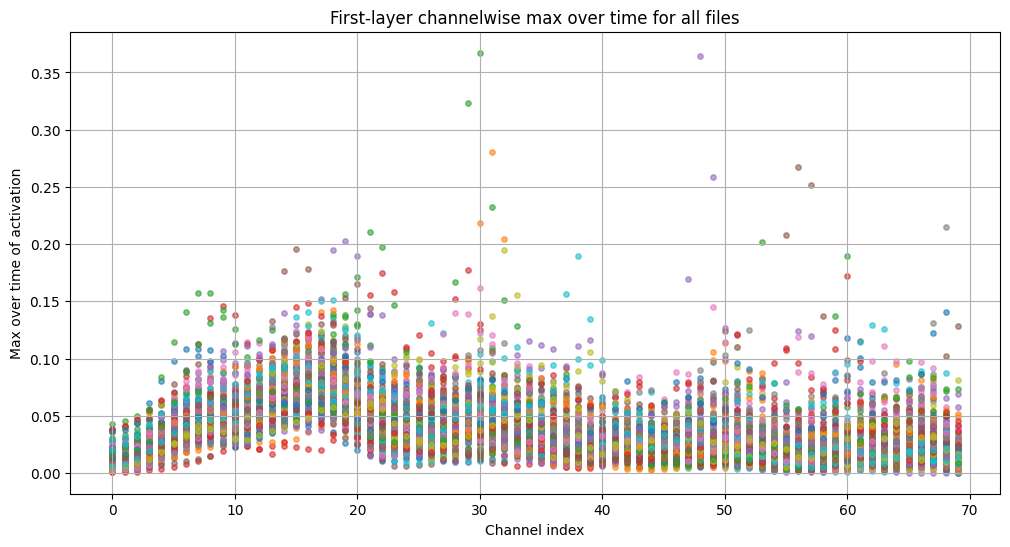

In [14]:
# ============================================
# AASIST - First layer max-over-time per channel, for a whole folder
# ============================================
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_FOLDER     = "./experiment/Calibration_3_train_20_each"          # 16 kHz mono is ideal

# 2) Options
SAMPLE_RATE        = 16000
BATCH_SIZE_MAX     = 16         # micro-batch size
BUCKET_TOL         = 2.0        # files in a bucket have length within 2x
PER_FILE_MASK      = False      # True = independent freq mask per file if freq_aug=True in config
NORMALIZE_PER_FILE = False      # True = L2-normalize each vector of channelwise maxima before plotting
SHOW_LEGEND        = False      # set True if few files, otherwise legend gets long
SAVE_CSV           = False      # save a CSV of per-file vectors
CSV_PATH           = "./experiment/csv/first_layer_channelwise_max.csv"

# 3) Install deps if needed
# !pip -q install soundfile scipy matplotlib --upgrade

import os
import json
import math
import numpy as np
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample
from typing import List, Tuple

# Ensure project modules are importable, e.g.:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

def list_wavs_with_lengths(folder: str) -> List[Tuple[str, int]]:
    files = [f for f in os.listdir(folder) if f.lower().endswith(".flac")]
    files.sort()
    out = []
    for f in files:
        try:
            info = sf.info(os.path.join(folder, f))
            out.append((f, int(info.frames)))
        except Exception:
            wav = load_audio(os.path.join(folder, f), SAMPLE_RATE)
            out.append((f, len(wav)))
    out.sort(key=lambda x: x[1])
    return out

def conv1d_out_len(L: int, k: int, s: int = 1, p: int = 0, d: int = 1) -> int:
    return math.floor((L + 2*p - d*(k - 1) - 1)/s + 1)

# 4) Load config and model
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug_flag = str_to_bool(cfg.get("freq_aug", "False"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)
model.eval()
torch.set_grad_enabled(False)

# Effective kernel size in AASIST.CONV (forces odd)
first_conv_cfg = int(d_args["first_conv"])
first_conv_eff = first_conv_cfg if first_conv_cfg % 2 == 1 else first_conv_cfg + 1

# 5) Build buckets to reduce padding waste
pairs = list_wavs_with_lengths(AUDIO_FOLDER)
if not pairs:
    raise RuntimeError("No .flac files found in AUDIO_FOLDER")

batches = []
bucket = []
bucket_min = None
for fname, L in pairs:
    if not bucket:
        bucket = [(fname, L)]
        bucket_min = L
        continue
    if len(bucket) < BATCH_SIZE_MAX and L <= bucket_min * BUCKET_TOL:
        bucket.append((fname, L))
    else:
        batches.append(bucket)
        bucket = [(fname, L)]
        bucket_min = L
if bucket:
    batches.append(bucket)

print(f"Total files: {len(pairs)}  |  Buckets formed: {len(batches)}")

# 6) Run and collect per-file channelwise maxima over time
file_names_all = []
channelwise_max_list = []  # list of arrays shape [C_out]

with torch.no_grad():
    for b_idx, bucket in enumerate(batches, start=1):
        names = [x[0] for x in bucket]
        wavs  = [load_audio(os.path.join(AUDIO_FOLDER, nm), SAMPLE_RATE) for nm in names]
        max_len = max(len(w) for w in wavs)
        padded = [np.pad(w, (0, max_len - len(w))) if len(w) < max_len else w for w in wavs]
        x = torch.from_numpy(np.stack(padded)).unsqueeze(1).to(device)  # [B_local, 1, T_pad]
        B_local = x.shape[0]

        # forward first layer
        if PER_FILE_MASK:
            ys = []
            for i in range(B_local):
                ys.append(model.conv_time(x[i:i+1], mask=freq_aug_flag))  # [1, C_out, T_out_pad]
            y = torch.cat(ys, dim=0)  # [B_local, C_out, T_out_pad]
        else:
            y = model.conv_time(x, mask=freq_aug_flag)  # one mask for the batch

        _, C_out, T_out_pad = y.shape

        # compute true T_out for each file to avoid padding bias
        T_out_true = [max(0, conv1d_out_len(len(w), first_conv_eff, 1, 0, 1)) for w in wavs]

        # per-file channelwise maxima over time
        for i, nm in enumerate(names):
            Tt = T_out_true[i]
            if Tt > 0:
                # max over time axis for true valid region
                m = y[i, :, :Tt].abs().max(dim=1).values  # or remove .abs() if signed maxima desired
            else:
                m = torch.zeros(C_out, device=y.device)
            vec = m.detach().cpu().numpy()  # [C_out]
            if NORMALIZE_PER_FILE:
                denom = np.linalg.norm(vec) + 1e-12
                vec = vec / denom
            file_names_all.append(nm)
            channelwise_max_list.append(vec)

# 7) Stack to [N_files, C_out]
features = np.stack(channelwise_max_list, axis=0)
N_files, C_out = features.shape
print(f"Collected features: {features.shape}  (files x channels)")

# 8) Plot: all files on the same figure, x-axis is channel index, y-axis is max over time
plt.figure(figsize=(12, 6))
x_axis = np.arange(C_out)
for i in range(N_files):
    plt.scatter(x_axis, features[i], s=15, alpha=0.6)
plt.title("First-layer channelwise max over time for all files")
plt.xlabel("Channel index")
plt.ylabel("Max over time of activation")
plt.grid(True)
if SHOW_LEGEND and N_files <= 20:
    plt.legend([os.path.basename(n) for n in file_names_all], fontsize=8)
plt.show()

# 9) Optional: save CSV
if SAVE_CSV:
    import csv
    with open(CSV_PATH, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["filename"] + [f"ch_{c}" for c in range(C_out)]
        writer.writerow(header)
        for nm, row in zip(file_names_all, features):
            writer.writerow([nm] + list(map(float, row)))
    print(f"Saved: {CSV_PATH}")


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
Total files: 150  |  Buckets formed: 10
Collected features: (150, 70)  (files x channels)


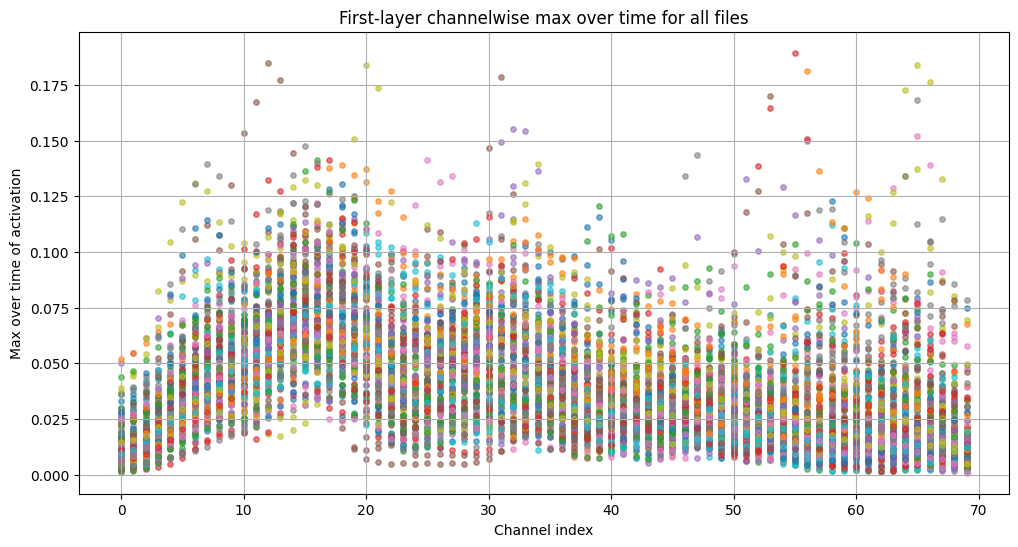

In [15]:
# ============================================
# AASIST - First layer max-over-time per channel, for a whole folder
# ============================================
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_FOLDER     = "./experiment/Calibration_8_eval_150_random"          # 16 kHz mono is ideal

# 2) Options
SAMPLE_RATE        = 16000
BATCH_SIZE_MAX     = 16         # micro-batch size
BUCKET_TOL         = 2.0        # files in a bucket have length within 2x
PER_FILE_MASK      = False      # True = independent freq mask per file if freq_aug=True in config
NORMALIZE_PER_FILE = False      # True = L2-normalize each vector of channelwise maxima before plotting
SHOW_LEGEND        = False      # set True if few files, otherwise legend gets long
SAVE_CSV           = False      # save a CSV of per-file vectors
CSV_PATH           = "./experiment/csv/first_layer_channelwise_max.csv"

# 3) Install deps if needed
# !pip -q install soundfile scipy matplotlib --upgrade

import os
import json
import math
import numpy as np
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample
from typing import List, Tuple

# Ensure project modules are importable, e.g.:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

def list_wavs_with_lengths(folder: str) -> List[Tuple[str, int]]:
    files = [f for f in os.listdir(folder) if f.lower().endswith(".flac")]
    files.sort()
    out = []
    for f in files:
        try:
            info = sf.info(os.path.join(folder, f))
            out.append((f, int(info.frames)))
        except Exception:
            wav = load_audio(os.path.join(folder, f), SAMPLE_RATE)
            out.append((f, len(wav)))
    out.sort(key=lambda x: x[1])
    return out

def conv1d_out_len(L: int, k: int, s: int = 1, p: int = 0, d: int = 1) -> int:
    return math.floor((L + 2*p - d*(k - 1) - 1)/s + 1)

# 4) Load config and model
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug_flag = str_to_bool(cfg.get("freq_aug", "False"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)
model.eval()
torch.set_grad_enabled(False)

# Effective kernel size in AASIST.CONV (forces odd)
first_conv_cfg = int(d_args["first_conv"])
first_conv_eff = first_conv_cfg if first_conv_cfg % 2 == 1 else first_conv_cfg + 1

# 5) Build buckets to reduce padding waste
pairs = list_wavs_with_lengths(AUDIO_FOLDER)
if not pairs:
    raise RuntimeError("No .flac files found in AUDIO_FOLDER")

batches = []
bucket = []
bucket_min = None
for fname, L in pairs:
    if not bucket:
        bucket = [(fname, L)]
        bucket_min = L
        continue
    if len(bucket) < BATCH_SIZE_MAX and L <= bucket_min * BUCKET_TOL:
        bucket.append((fname, L))
    else:
        batches.append(bucket)
        bucket = [(fname, L)]
        bucket_min = L
if bucket:
    batches.append(bucket)

print(f"Total files: {len(pairs)}  |  Buckets formed: {len(batches)}")

# 6) Run and collect per-file channelwise maxima over time
file_names_all = []
channelwise_max_list = []  # list of arrays shape [C_out]

with torch.no_grad():
    for b_idx, bucket in enumerate(batches, start=1):
        names = [x[0] for x in bucket]
        wavs  = [load_audio(os.path.join(AUDIO_FOLDER, nm), SAMPLE_RATE) for nm in names]
        max_len = max(len(w) for w in wavs)
        padded = [np.pad(w, (0, max_len - len(w))) if len(w) < max_len else w for w in wavs]
        x = torch.from_numpy(np.stack(padded)).unsqueeze(1).to(device)  # [B_local, 1, T_pad]
        B_local = x.shape[0]

        # forward first layer
        if PER_FILE_MASK:
            ys = []
            for i in range(B_local):
                ys.append(model.conv_time(x[i:i+1], mask=freq_aug_flag))  # [1, C_out, T_out_pad]
            y = torch.cat(ys, dim=0)  # [B_local, C_out, T_out_pad]
        else:
            y = model.conv_time(x, mask=freq_aug_flag)  # one mask for the batch

        _, C_out, T_out_pad = y.shape

        # compute true T_out for each file to avoid padding bias
        T_out_true = [max(0, conv1d_out_len(len(w), first_conv_eff, 1, 0, 1)) for w in wavs]

        # per-file channelwise maxima over time
        for i, nm in enumerate(names):
            Tt = T_out_true[i]
            if Tt > 0:
                # max over time axis for true valid region
                m = y[i, :, :Tt].abs().max(dim=1).values  # or remove .abs() if signed maxima desired
            else:
                m = torch.zeros(C_out, device=y.device)
            vec = m.detach().cpu().numpy()  # [C_out]
            if NORMALIZE_PER_FILE:
                denom = np.linalg.norm(vec) + 1e-12
                vec = vec / denom
            file_names_all.append(nm)
            channelwise_max_list.append(vec)

# 7) Stack to [N_files, C_out]
features = np.stack(channelwise_max_list, axis=0)
N_files, C_out = features.shape
print(f"Collected features: {features.shape}  (files x channels)")

# 8) Plot: all files on the same figure, x-axis is channel index, y-axis is max over time
plt.figure(figsize=(12, 6))
x_axis = np.arange(C_out)
for i in range(N_files):
    plt.scatter(x_axis, features[i], s=15, alpha=0.6)
plt.title("First-layer channelwise max over time for all files")
plt.xlabel("Channel index")
plt.ylabel("Max over time of activation")
plt.grid(True)
if SHOW_LEGEND and N_files <= 20:
    plt.legend([os.path.basename(n) for n in file_names_all], fontsize=8)
plt.show()

# 9) Optional: save CSV
if SAVE_CSV:
    import csv
    with open(CSV_PATH, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["filename"] + [f"ch_{c}" for c in range(C_out)]
        writer.writerow(header)
        for nm, row in zip(file_names_all, features):
            writer.writerow([nm] + list(map(float, row)))
    print(f"Saved: {CSV_PATH}")


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
Total files: 150  |  Buckets formed: 10
Collected features: (150, 70)  (files x channels)


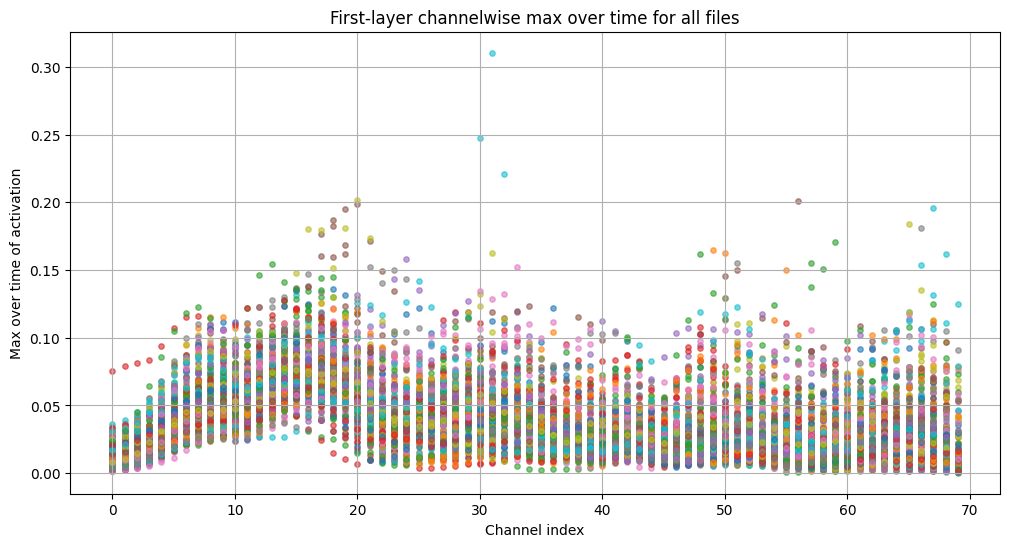

In [16]:
# ============================================
# AASIST - First layer max-over-time per channel, for a whole folder
# ============================================
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_FOLDER     = "./experiment/Calibration_7_train_150_random"          # 16 kHz mono is ideal

# 2) Options
SAMPLE_RATE        = 16000
BATCH_SIZE_MAX     = 16         # micro-batch size
BUCKET_TOL         = 2.0        # files in a bucket have length within 2x
PER_FILE_MASK      = False      # True = independent freq mask per file if freq_aug=True in config
NORMALIZE_PER_FILE = False      # True = L2-normalize each vector of channelwise maxima before plotting
SHOW_LEGEND        = False      # set True if few files, otherwise legend gets long
SAVE_CSV           = False      # save a CSV of per-file vectors
CSV_PATH           = "./experiment/csv/first_layer_channelwise_max.csv"

# 3) Install deps if needed
# !pip -q install soundfile scipy matplotlib --upgrade

import os
import json
import math
import numpy as np
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample
from typing import List, Tuple

# Ensure project modules are importable, e.g.:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

def list_wavs_with_lengths(folder: str) -> List[Tuple[str, int]]:
    files = [f for f in os.listdir(folder) if f.lower().endswith(".flac")]
    files.sort()
    out = []
    for f in files:
        try:
            info = sf.info(os.path.join(folder, f))
            out.append((f, int(info.frames)))
        except Exception:
            wav = load_audio(os.path.join(folder, f), SAMPLE_RATE)
            out.append((f, len(wav)))
    out.sort(key=lambda x: x[1])
    return out

def conv1d_out_len(L: int, k: int, s: int = 1, p: int = 0, d: int = 1) -> int:
    return math.floor((L + 2*p - d*(k - 1) - 1)/s + 1)

# 4) Load config and model
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug_flag = str_to_bool(cfg.get("freq_aug", "False"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)
model.eval()
torch.set_grad_enabled(False)

# Effective kernel size in AASIST.CONV (forces odd)
first_conv_cfg = int(d_args["first_conv"])
first_conv_eff = first_conv_cfg if first_conv_cfg % 2 == 1 else first_conv_cfg + 1

# 5) Build buckets to reduce padding waste
pairs = list_wavs_with_lengths(AUDIO_FOLDER)
if not pairs:
    raise RuntimeError("No .flac files found in AUDIO_FOLDER")

batches = []
bucket = []
bucket_min = None
for fname, L in pairs:
    if not bucket:
        bucket = [(fname, L)]
        bucket_min = L
        continue
    if len(bucket) < BATCH_SIZE_MAX and L <= bucket_min * BUCKET_TOL:
        bucket.append((fname, L))
    else:
        batches.append(bucket)
        bucket = [(fname, L)]
        bucket_min = L
if bucket:
    batches.append(bucket)

print(f"Total files: {len(pairs)}  |  Buckets formed: {len(batches)}")

# 6) Run and collect per-file channelwise maxima over time
file_names_all = []
channelwise_max_list = []  # list of arrays shape [C_out]

with torch.no_grad():
    for b_idx, bucket in enumerate(batches, start=1):
        names = [x[0] for x in bucket]
        wavs  = [load_audio(os.path.join(AUDIO_FOLDER, nm), SAMPLE_RATE) for nm in names]
        max_len = max(len(w) for w in wavs)
        padded = [np.pad(w, (0, max_len - len(w))) if len(w) < max_len else w for w in wavs]
        x = torch.from_numpy(np.stack(padded)).unsqueeze(1).to(device)  # [B_local, 1, T_pad]
        B_local = x.shape[0]

        # forward first layer
        if PER_FILE_MASK:
            ys = []
            for i in range(B_local):
                ys.append(model.conv_time(x[i:i+1], mask=freq_aug_flag))  # [1, C_out, T_out_pad]
            y = torch.cat(ys, dim=0)  # [B_local, C_out, T_out_pad]
        else:
            y = model.conv_time(x, mask=freq_aug_flag)  # one mask for the batch

        _, C_out, T_out_pad = y.shape

        # compute true T_out for each file to avoid padding bias
        T_out_true = [max(0, conv1d_out_len(len(w), first_conv_eff, 1, 0, 1)) for w in wavs]

        # per-file channelwise maxima over time
        for i, nm in enumerate(names):
            Tt = T_out_true[i]
            if Tt > 0:
                # max over time axis for true valid region
                m = y[i, :, :Tt].abs().max(dim=1).values  # or remove .abs() if signed maxima desired
            else:
                m = torch.zeros(C_out, device=y.device)
            vec = m.detach().cpu().numpy()  # [C_out]
            if NORMALIZE_PER_FILE:
                denom = np.linalg.norm(vec) + 1e-12
                vec = vec / denom
            file_names_all.append(nm)
            channelwise_max_list.append(vec)

# 7) Stack to [N_files, C_out]
features = np.stack(channelwise_max_list, axis=0)
N_files, C_out = features.shape
print(f"Collected features: {features.shape}  (files x channels)")

# 8) Plot: all files on the same figure, x-axis is channel index, y-axis is max over time
plt.figure(figsize=(12, 6))
x_axis = np.arange(C_out)
for i in range(N_files):
    plt.scatter(x_axis, features[i], s=15, alpha=0.6)
plt.title("First-layer channelwise max over time for all files")
plt.xlabel("Channel index")
plt.ylabel("Max over time of activation")
plt.grid(True)
if SHOW_LEGEND and N_files <= 20:
    plt.legend([os.path.basename(n) for n in file_names_all], fontsize=8)
plt.show()

# 9) Optional: save CSV
if SAVE_CSV:
    import csv
    with open(CSV_PATH, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["filename"] + [f"ch_{c}" for c in range(C_out)]
        writer.writerow(header)
        for nm, row in zip(file_names_all, features):
            writer.writerow([nm] + list(map(float, row)))
    print(f"Saved: {CSV_PATH}")


/content/drive/MyDrive/Researches/Anti_spoofing/aasist
Using device: cuda
Total files: 500  |  Buckets formed: 32
Collected features: (500, 70)  (files x channels)


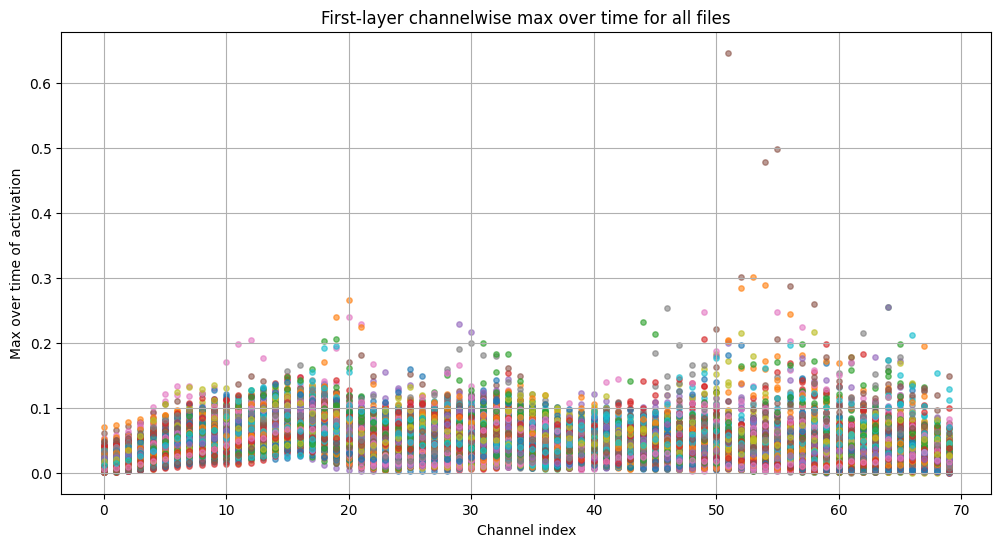

In [17]:
# ============================================
# AASIST - First layer max-over-time per channel, for a whole folder
# ============================================
%cd /content/drive/MyDrive/Researches/Anti_spoofing/aasist
# =========================
# AASIST: first-layer probe
# =========================
# 1) Fill these paths
CONFIG_JSON   = "./config/AASIST.conf"        # e.g. "/content/2021/LA/config.json"
CHECKPOINT_PTH= "./models/weights/AASIST.pth"   # e.g. "/content/weights/best.pth"
AUDIO_FOLDER     = "./experiment/Evaluation_500_unique_to_all_calibrations"          # 16 kHz mono is ideal

# 2) Options
SAMPLE_RATE        = 16000
BATCH_SIZE_MAX     = 16         # micro-batch size
BUCKET_TOL         = 2.0        # files in a bucket have length within 2x
PER_FILE_MASK      = False      # True = independent freq mask per file if freq_aug=True in config
NORMALIZE_PER_FILE = False      # True = L2-normalize each vector of channelwise maxima before plotting
SHOW_LEGEND        = False      # set True if few files, otherwise legend gets long
SAVE_CSV           = False      # save a CSV of per-file vectors
CSV_PATH           = "./experiment/csv/first_layer_channelwise_max.csv"

# 3) Install deps if needed
# !pip -q install soundfile scipy matplotlib --upgrade

import os
import json
import math
import numpy as np
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import resample
from typing import List, Tuple

# Ensure project modules are importable, e.g.:
# %cd /content/your_project_root

from AASIST import Model
try:
    from utils import str_to_bool
except Exception:
    def str_to_bool(x):
        return str(x).lower() in {"1", "true", "yes", "y", "t"}

def load_audio(path: str, target_sr: int = 16000) -> np.ndarray:
    wav, sr = sf.read(path)
    if wav.ndim == 2:
        wav = wav.mean(axis=1)
    if sr != target_sr:
        num = int(len(wav) * float(target_sr) / sr)
        wav = resample(wav, num)
    return wav.astype(np.float32)

def list_wavs_with_lengths(folder: str) -> List[Tuple[str, int]]:
    files = [f for f in os.listdir(folder) if f.lower().endswith(".flac")]
    files.sort()
    out = []
    for f in files:
        try:
            info = sf.info(os.path.join(folder, f))
            out.append((f, int(info.frames)))
        except Exception:
            wav = load_audio(os.path.join(folder, f), SAMPLE_RATE)
            out.append((f, len(wav)))
    out.sort(key=lambda x: x[1])
    return out

def conv1d_out_len(L: int, k: int, s: int = 1, p: int = 0, d: int = 1) -> int:
    return math.floor((L + 2*p - d*(k - 1) - 1)/s + 1)

# 4) Load config and model
with open(CONFIG_JSON, "r") as f:
    cfg = json.load(f)
d_args = cfg["model_config"]
freq_aug_flag = str_to_bool(cfg.get("freq_aug", "False"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Model(d_args).to(device)
ckpt = torch.load(CHECKPOINT_PTH, map_location=device)
state_dict = ckpt.get("state_dict", ckpt)
load_res = model.load_state_dict(state_dict, strict=False)
if getattr(load_res, "unexpected_keys", []):
    print("Warning: unexpected keys:", load_res.unexpected_keys)
if getattr(load_res, "missing_keys", []):
    print("Warning: missing keys:", load_res.missing_keys)
model.eval()
torch.set_grad_enabled(False)

# Effective kernel size in AASIST.CONV (forces odd)
first_conv_cfg = int(d_args["first_conv"])
first_conv_eff = first_conv_cfg if first_conv_cfg % 2 == 1 else first_conv_cfg + 1

# 5) Build buckets to reduce padding waste
pairs = list_wavs_with_lengths(AUDIO_FOLDER)
if not pairs:
    raise RuntimeError("No .flac files found in AUDIO_FOLDER")

batches = []
bucket = []
bucket_min = None
for fname, L in pairs:
    if not bucket:
        bucket = [(fname, L)]
        bucket_min = L
        continue
    if len(bucket) < BATCH_SIZE_MAX and L <= bucket_min * BUCKET_TOL:
        bucket.append((fname, L))
    else:
        batches.append(bucket)
        bucket = [(fname, L)]
        bucket_min = L
if bucket:
    batches.append(bucket)

print(f"Total files: {len(pairs)}  |  Buckets formed: {len(batches)}")

# 6) Run and collect per-file channelwise maxima over time
file_names_all = []
channelwise_max_list = []  # list of arrays shape [C_out]

with torch.no_grad():
    for b_idx, bucket in enumerate(batches, start=1):
        names = [x[0] for x in bucket]
        wavs  = [load_audio(os.path.join(AUDIO_FOLDER, nm), SAMPLE_RATE) for nm in names]
        max_len = max(len(w) for w in wavs)
        padded = [np.pad(w, (0, max_len - len(w))) if len(w) < max_len else w for w in wavs]
        x = torch.from_numpy(np.stack(padded)).unsqueeze(1).to(device)  # [B_local, 1, T_pad]
        B_local = x.shape[0]

        # forward first layer
        if PER_FILE_MASK:
            ys = []
            for i in range(B_local):
                ys.append(model.conv_time(x[i:i+1], mask=freq_aug_flag))  # [1, C_out, T_out_pad]
            y = torch.cat(ys, dim=0)  # [B_local, C_out, T_out_pad]
        else:
            y = model.conv_time(x, mask=freq_aug_flag)  # one mask for the batch

        _, C_out, T_out_pad = y.shape

        # compute true T_out for each file to avoid padding bias
        T_out_true = [max(0, conv1d_out_len(len(w), first_conv_eff, 1, 0, 1)) for w in wavs]

        # per-file channelwise maxima over time
        for i, nm in enumerate(names):
            Tt = T_out_true[i]
            if Tt > 0:
                # max over time axis for true valid region
                m = y[i, :, :Tt].abs().max(dim=1).values  # or remove .abs() if signed maxima desired
            else:
                m = torch.zeros(C_out, device=y.device)
            vec = m.detach().cpu().numpy()  # [C_out]
            if NORMALIZE_PER_FILE:
                denom = np.linalg.norm(vec) + 1e-12
                vec = vec / denom
            file_names_all.append(nm)
            channelwise_max_list.append(vec)

# 7) Stack to [N_files, C_out]
features = np.stack(channelwise_max_list, axis=0)
N_files, C_out = features.shape
print(f"Collected features: {features.shape}  (files x channels)")

# 8) Plot: all files on the same figure, x-axis is channel index, y-axis is max over time
plt.figure(figsize=(12, 6))
x_axis = np.arange(C_out)
for i in range(N_files):
    plt.scatter(x_axis, features[i], s=15, alpha=0.6)
plt.title("First-layer channelwise max over time for all files")
plt.xlabel("Channel index")
plt.ylabel("Max over time of activation")
plt.grid(True)
if SHOW_LEGEND and N_files <= 20:
    plt.legend([os.path.basename(n) for n in file_names_all], fontsize=8)
plt.show()

# 9) Optional: save CSV
if SAVE_CSV:
    import csv
    with open(CSV_PATH, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["filename"] + [f"ch_{c}" for c in range(C_out)]
        writer.writerow(header)
        for nm, row in zip(file_names_all, features):
            writer.writerow([nm] + list(map(float, row)))
    print(f"Saved: {CSV_PATH}")
